In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt 

from dedalus import public as de
from dedalus.extras import plot_tools

In [2]:
# Wavenumber
g = 1.0 # non-dimensional for now
k = 0.1

n = 32
h = 10
L = 20

a_basis = de.Fourier('a', n, interval=(-L/2, L/2))
b_basis = de.Chebyshev('b', n, interval=(-h, 0)) 

domain = de.Domain([a_basis, b_basis], grid_dtype=np.float64)

In [3]:
problem = de.IVP(domain, variables=['xw', 'yw', 'uw', 'vw', 'pw',
                                    'xm', 'ym', 'um', 'vm', 'pm']

problem.substitutions("J1(r, s) = (da(conj(r)) - 1j * k * conj(r)) * db(s)       - db(conj(r)) * (da(s)       + 1j * k * s)")
problem.substitutions("J2(r, s) = (da(r)       + 1j * k * r      ) * db(conj(s)) - db(r)       * (da(conj(s)) - 1j * k * conj(s))")

problem.substitutions("J(r, s) = J1(r, s) + J2(r, s)")
# Identities
problem.add_equation("dt(xw) - uw = 0")
problem.add_equation("dt(xm) - um = 0")
problem.add_equation("dt(yw) - yw = 0")
problem.add_equation("dt(vm) - vm = 0")

# Mass conservation to ϵ^2
problem.add_equation("da(xw) + db(yw) = 0")
problem.add_equation("da(xm) + db(ym) = - J(xw, yw)")

# Momentum conservation
problem.add_equation("dt(uw) - 1j * σ * uw + da(pw) + 1j * k * pw                 = 0")
problem.add_equation("dt(vw) - 1j * σ * vw + db(pw) - g * da(xw) - 1j * σ**2 * xw = 0")
                 
problem.add_equation("dt(um) + da(pm)              = -J(pw, yw)")
problem.add_equation("dt(vm) + db(pm) - g * da(xm) = -J(xw, pw)")

SyntaxError: invalid syntax (<ipython-input-3-6ee8b4dbe0b9>, line 4)

In [ ]:
# Build solver
solver = problem.build_solver()
solver.solve()

0.4254607656118138 0.720366182278648 0.5594584414477604 1.0073310290691968


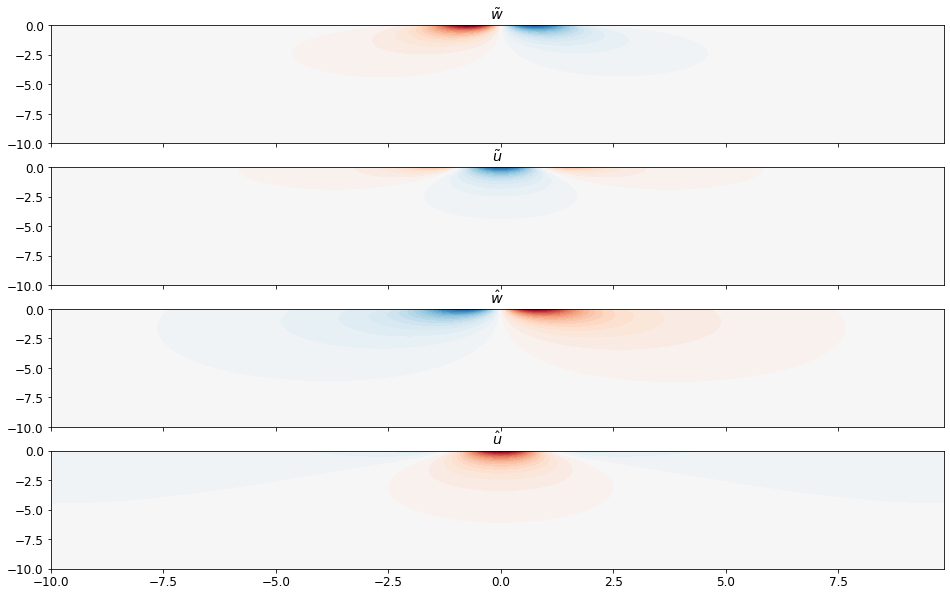

In [275]:
# Plot solution
plt.rcParams.update({'font.size': 12})


fig, axs = plt.subplots(nrows=4, figsize=(16, 10), sharey=True, sharex=True) 
scale = 4 

x = domain.grid(0, scales=scale)
z = domain.grid(1, scales=scale)

X, Z = np.meshgrid(x, z)

wi = solver.state['wi']
wf = solver.state['wf']
ui = solver.state['ui']
uf = solver.state['uf']

for ϕ in (wi, wf, ui, uf):
    ϕ.set_scales(scale)
    ϕ.require_grid_space()

wimax = np.max(np.abs(wi['g']))
wfmax = np.max(np.abs(wf['g']))
uimax = np.max(np.abs(ui['g']))
ufmax = np.max(np.abs(uf['g']))

print(wimax, wfmax, uimax, ufmax)

levs = np.linspace(-1, 1, num=50)

plt.sca(axs[0])
im0 = plt.contourf(X, Z, wi['g'][:, :].T / wimax, cmap="RdBu_r", vmin=-1, vmax=1, levels=levs)
plt.title("$ \\tilde w $")

plt.sca(axs[1])
im0 = plt.contourf(X, Z, ui['g'][:, :].T / uimax, cmap="RdBu_r", vmin=-1, vmax=1, levels=levs)
plt.title("$ \\tilde u $")

plt.sca(axs[2])
im0 = plt.contourf(X, Z, wf['g'][:, :].T / wfmax, cmap="RdBu_r", vmin=-1, vmax=1, levels=levs)
plt.title("$ \hat w $")

plt.sca(axs[3])
im0 = plt.contourf(X, Z, uf['g'][:, :].T / ufmax, cmap="RdBu_r", vmin=-1, vmax=1, levels=levs)
plt.title("$ \hat u $")

for ax in axs:
    plt.sca(ax)
    plt.ylim(-10, 0)

0.4254607656118138 0.720366182278648 0.5594584414477604 1.0073310290691968


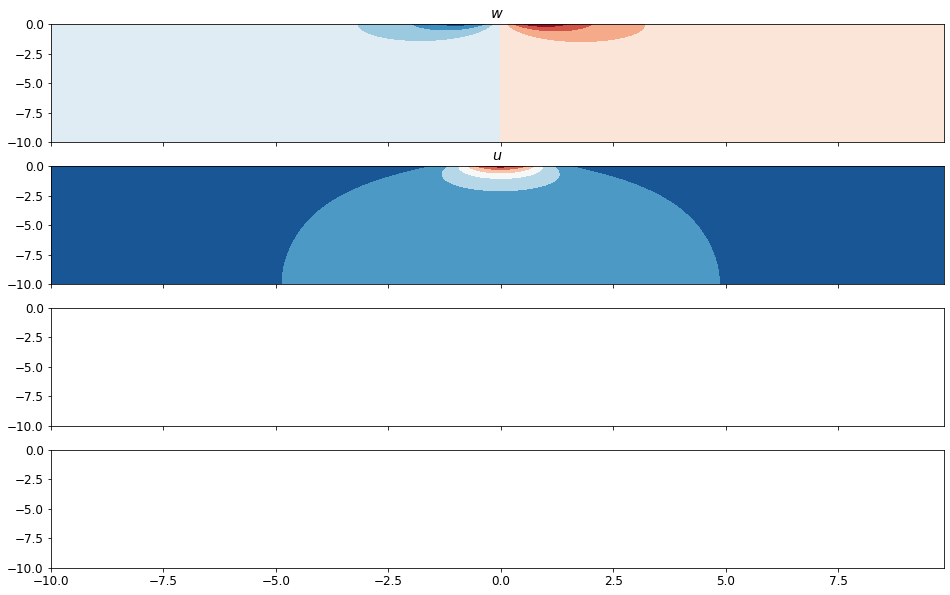

In [279]:
# Plot solution
plt.rcParams.update({'font.size': 12})


fig, axs = plt.subplots(nrows=4, figsize=(16, 10), sharey=True, sharex=True) 
scale = 4 

x = domain.grid(0, scales=scale)
z = domain.grid(1, scales=scale)

X, Z = np.meshgrid(x, z)

wi = solver.state['wi']
wf = solver.state['wf']
ui = solver.state['ui']
uf = solver.state['uf']

for ϕ in (wi, wf, ui, uf):
    ϕ.set_scales(scale)
    ϕ.require_grid_space()

wimax = np.max(np.abs(wi['g']))
wfmax = np.max(np.abs(wf['g']))
uimax = np.max(np.abs(ui['g']))
ufmax = np.max(np.abs(uf['g']))

print(wimax, wfmax, uimax, ufmax)

w = wf['g'][:, :] + wi['g'][:, :]
u = uf['g'][:, :] + ui['g'][:, :]

levs = np.linspace(-1, 1, num=50)

plt.sca(axs[0])
im0 = plt.contourf(X, Z, w.T, cmap="RdBu_r")
plt.title("$ w $")

plt.sca(axs[1])
im0 = plt.contourf(X, Z, u.T, cmap="RdBu_r")
plt.title("$ u $")

for ax in axs:
    plt.sca(ax)
    plt.ylim(-10, 0)

$u$ and $w$ are related via

$$ u_b - w_a = 0 \, ,$$

which implies that

$$ \tilde u_b - \tilde w_a = 0 \, \qquad \text{and} \qquad \hat u_b - \hat w_a = 0 \, . $$

In [181]:
problem.add_equation("db(uᵖ) - da(wᵖ) = 0")
problem.add_equation("db(uᶠ) - da(wᶠ) = 0")

NameError: name 'up' is not defined

In [102]:
problem2 = de.LBVP(domain, variables=['ψ', 'ψz'])

Φz = solver.state['Φz']

problem2.parameters["Φz"] = Φz

problem2.add_equation("dx(dx(ψ)) + dz(ψz) = 0", condition="(nx != 0)")

problem2.add_equation("ψ = 0", condition="(nx == 0)")
problem2.add_equation("ψz = 0", condition="(nx == 0)")
problem2.add_equation("dz(ψ) - ψz = 0", condition="(nx != 0)")

problem2.add_bc("left(dx(ψ)) = 0", condition="(nx != 0)")
problem2.add_bc("right(dx(ψ)) = interp(Φz, z=0)", condition="(nx != 0)")

# Build solver
solver2 = problem2.build_solver()
solver2.solve()

NameError: name 'solver' is not defined

In [15]:
Φ = solver.state['Φ']
ψ = solver2.state['ψ']

u_op = de.operators.differentiate(Φ, x=1)
w_op = de.operators.differentiate(Φ, z=1)

u = u_op.evaluate()
w = w_op.evaluate()

(-10.0, 0.0)

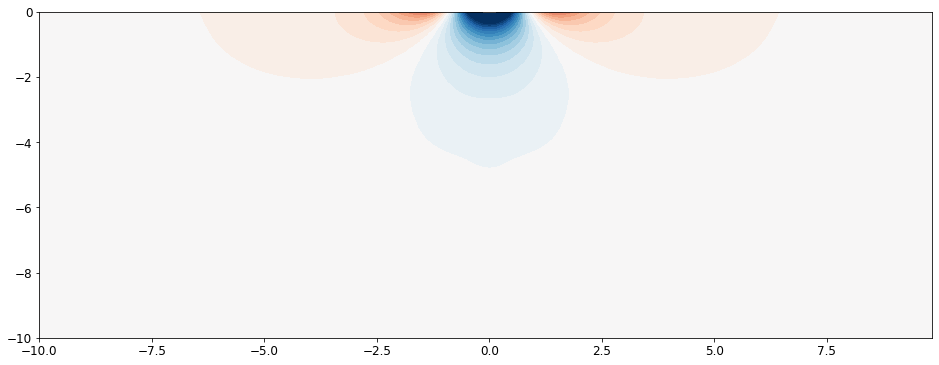

In [17]:
# Plot solution
plt.rcParams.update({'font.size': 12})

fig, axs = plt.subplots(ncols=1, figsize=(16, 6), sharey=True) 
scale = 4 

x = domain.grid(0, scales=scale)
#y = domain.grid(1, scales=scale)
z = domain.grid(1, scales=scale)

X, Z = np.meshgrid(x, z)

Φ.set_scales(scale)
Φ.require_grid_space()

ψ.set_scales(scale)
ψ.require_grid_space()

u.set_scales(scale)
u.require_grid_space()

w.set_scales(scale)
w.require_grid_space()

ulim = 0.6
levs = np.linspace(-1, 1, 50)

plt.sca(axs)

im0 = plt.contourf(X, Z, u['g'][:, :].T, cmap="RdBu_r", vmin=-ulim, vmax=ulim, levels=levs)
plt.ylim(-10, 0)